<a href="https://colab.research.google.com/github/haleybanta/finalproject/blob/main/Group_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caroline

In [ ]:
%pip install -qqq davos
import davos

davos.suppress_stdout = True

In [ ]:
smuggle requests
smuggle os

smuggle pandas as pd
smuggle numpy as np
smuggle seaborn as sns

from plotly smuggle express as px
from matplotlib smuggle pyplot as plt
from tqdm smuggle tqdm

In [ ]:
def load_google_sheet(url, skip_rows=0, note=None, **kwargs):
    """
    Reads a Google Sheets document into a pandas DataFrame.

    Parameters:
    - url: str, The full URL to the Google Sheets document. Must be shared publicly or with the reader's account.
    - skip_rows: int, The number of initial rows to skip.

    Returns:
    - A pandas DataFrame containing the data from the Google Sheets document, excluding the specified number of initial rows.
    """

    if type(note) is str and note.lower() == 'skip':
      return pd.DataFrame()

    # Extract the sheet ID and gid from the URL
    start = url.find('/d/') + 3
    end = url.find('/edit', start)
    sheet_id = url[start:end]
    gid_index = url.find('gid=')
    gid = url[gid_index+4:] if gid_index != -1 else '0'

    # Construct the export URL
    export_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"

    # Use pandas to read the CSV exported by the Google Sheet
    return pd.read_csv(export_url, skiprows=range(0, skip_rows), **kwargs)

In [ ]:
#data_url = 'https://docs.google.com/spreadsheets/d/1UhabLJlbvjjOqZBvQqavi9hpkxvLoJ_8cFTJB-YW4UY/edit?usp=sharing'
data_url = 'https://docs.google.com/spreadsheets/d/1o9-tdx156v01SKV4z0iTrQmiwIurzrtFAVy3bpwQg2Y/edit?usp=sharing'
datasets = load_google_sheet(data_url)

In [ ]:
datasets

,Dataset name,URL,Description,Notes
0,Global Population if Carbon is $5,https://docs.google.com/spreadsheets/d/1lhI2SA...,"The global population, in billions of people. ...",NaN
1,Global Population if Carbon is $51,https://docs.google.com/spreadsheets/d/1jyRe6m...,NaN,NaN
2,Global Population if Carbon is $185,https://docs.google.com/spreadsheets/d/13UauFl...,NaN,NaN
3,GDP per Capita if carbon is $5,https://docs.google.com/spreadsheets/d/1OkkzXW...,Global Gross Domestic Product (GDP) per Capita...,NaN
4,GDP per Capita if carbon is $51,https://docs.google.com/spreadsheets/d/1hzGzfj...,NaN,NaN
5,GDP per Capita if carbon is $185,https://docs.google.com/spreadsheets/d/1QPu968...,NaN,NaN
6,Energy Intensity of GDP if carbon is $5,https://docs.google.com/spreadsheets/d/1dkhJYD...,The final energy intensity of GDP. A measure o...,NaN
7,Energy Intensity of GDP if carbon is $51,https://docs.google.com/spreadsheets/d/128CPYB...,NaN,NaN
8,Energy Intensity of GDP if carbon is $185,https://docs.google.com/spreadsheets/d/1LRrdyk...,NaN,NaN


In [ ]:
data = {x['Dataset name']: load_google_sheet(x['URL'], skip_rows=1, note=x['Notes']) for _, x in datasets.iterrows()}

In [ ]:
print('Datasets: ')
print('\t'+ "\n\t".join(list(data.keys())))

Datasets: 
	Global Population if Carbon is $5
	Global Population if Carbon is $51
	Global Population if Carbon is $185
	GDP per Capita if carbon is $5
	GDP per Capita if carbon is $51
	GDP per Capita if carbon is $185
	Energy Intensity of GDP if carbon is $5
	Energy Intensity of GDP if carbon is $51
	Energy Intensity of GDP if carbon is $185


In [ ]:
five = data['GDP per Capita if carbon is $5']
fifty_one = data['GDP per Capita if carbon is $51']
one_eighty_five = data['GDP per Capita if carbon is $185']

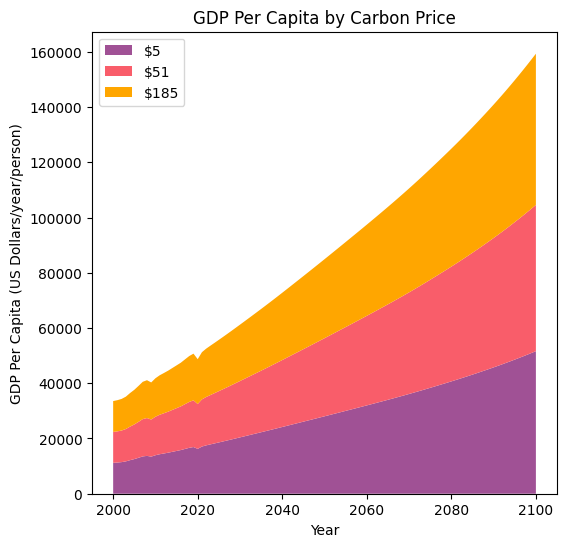

In [ ]:
# x should be years
# y values are five, 51, 185 current scenario values
# separate graph for no economic impact by temp


# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(6, 6))  # Set the figure size

plt.stackplot(five['Year'],
              five['Current Scenario'],
              fifty_one['Current Scenario'],
              one_eighty_five['Current Scenario'],
              colors=["#a05195","#f95d6a","#ffa600"],labels=['$5','$51','$185'])

plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('GDP Per Capita (US Dollars/year/person)') # Add a label for the y-axis
plt.title('GDP Per Capita by Carbon Price') # Add a title
plt.legend(loc='upper left') # Add a legend in the upper left corner of the plot

# Show the plot
plt.show()

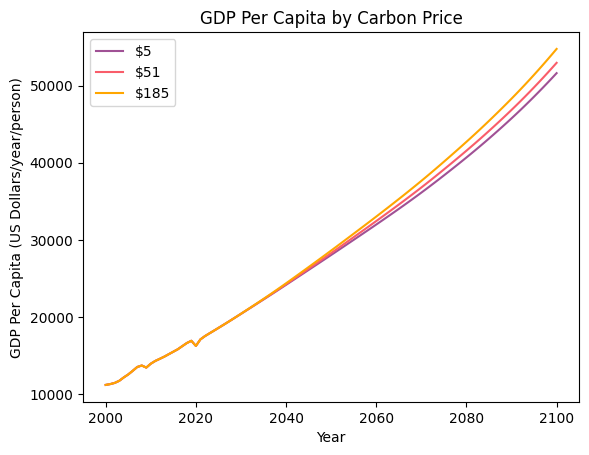

In [ ]:
x = five['Year']
y1 = five['Current Scenario']
y2 = fifty_one['Current Scenario']
y3 = one_eighty_five['Current Scenario']

plt.plot(x, y1, "#a05195", label="$5")
plt.plot(x, y2, "#f95d6a", label="$51")
plt.plot(x, y3, "#ffa600", label="$185")
plt.legend(loc="upper left")
plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('GDP Per Capita (US Dollars/year/person)') # Add a label for the y-axis
plt.title('GDP Per Capita by Carbon Price') # Add a title
plt.show()

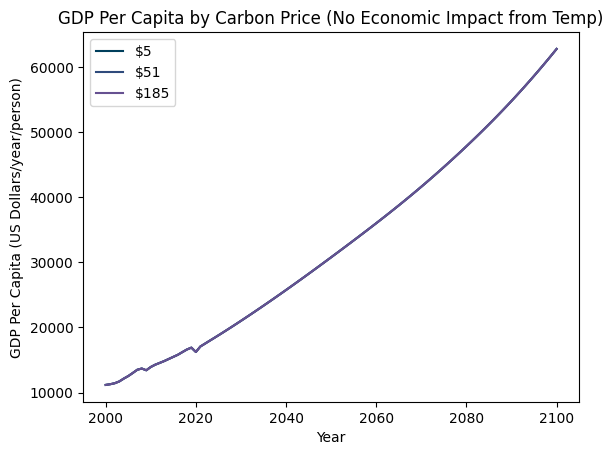

In [ ]:
x = five['Year']
y1 = five['Scenario if no economic impact from temp']
y2 = fifty_one['Scenario if no economic impact from temp']
y3 = one_eighty_five['Scenario if no economic impact from temp']

plt.plot(x, y1, "#003f5c", label="$5")
plt.plot(x, y2, "#2f4b7c", label="$51")
plt.plot(x, y3, "#665191", label="$185")
plt.legend(loc="upper left")
plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('GDP Per Capita (US Dollars/year/person)') # Add a label for the y-axis
plt.title('GDP Per Capita by Carbon Price (No Economic Impact from Temp)') # Add a title
plt.show()

In [ ]:
five_en = data['Energy Intensity of GDP if carbon is $5']
fifty_one_en = data['Energy Intensity of GDP if carbon is $51']
one_eighty_five_en = data['Energy Intensity of GDP if carbon is $185']

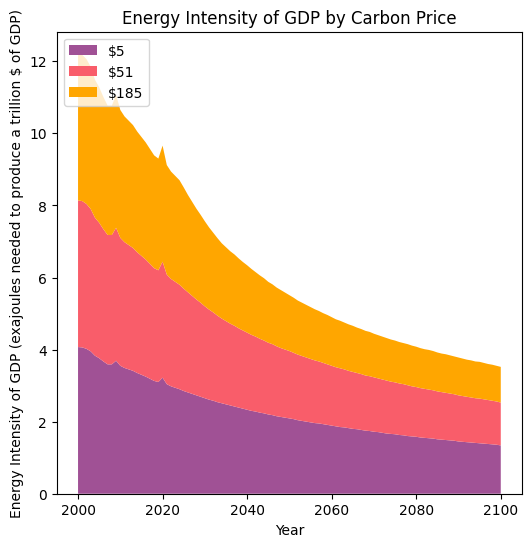

In [ ]:
# x should be years
# y values are five, 51, 185 current scenario values
# separate graph for no economic impact by temp


# Plot the stacked area chart with smoothing and custom colors
plt.figure(figsize=(6, 6))  # Set the figure size

plt.stackplot(five_en['Year'],
              five_en['Current Scenario'],
              fifty_one_en['Current Scenario'],
              one_eighty_five_en['Current Scenario'],
              colors=["#a05195","#f95d6a","#ffa600"],labels=['$5','$51','$185'])

plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('Energy Intensity of GDP (exajoules needed to produce a trillion $ of GDP)') # Add a label for the y-axis
plt.title('Energy Intensity of GDP by Carbon Price') # Add a title
plt.legend(loc='upper left') # Add a legend in the upper left corner of the plot

# Show the plot
plt.show()

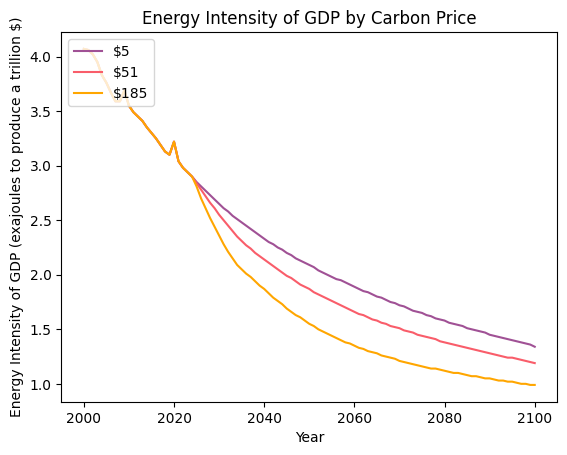

In [ ]:
x = five_en['Year']
y1 = five_en['Current Scenario']
y2 = fifty_one_en['Current Scenario']
y3 = one_eighty_five_en['Current Scenario']

plt.plot(x, y1, "#a05195", label="$5")
plt.plot(x, y2, "#f95d6a", label="$51")
plt.plot(x, y3, "#ffa600", label="$185")
plt.legend(loc="upper left")
plt.xlabel('Year') # Add a label for the x-axis
plt.ylabel('Energy Intensity of GDP (exajoules to produce a trillion $)') # Add a label for the y-axis
plt.title('Energy Intensity of GDP by Carbon Price') # Add a title
plt.show()

Haley

In [ ]:
def load_google_sheet(url, skip_rows=0, note=None, **kwargs):
    """
    Reads a Google Sheets document into a pandas DataFrame.

    Parameters:
    - url: str, The full URL to the Google Sheets document. Must be shared publicly or with the reader's account.
    - skip_rows: int, The number of initial rows to skip.

    Returns:
    - A pandas DataFrame containing the data from the Google Sheets document, excluding the specified number of initial rows.
    """

    if type(note) is str and note.lower() == 'skip':
      return pd.DataFrame()

    # Extract the sheet ID and gid from the URL
    start = url.find('/d/') + 3
    end = url.find('/edit', start)
    sheet_id = url[start:end]
    gid_index = url.find('gid=')
    gid = url[gid_index+4:] if gid_index != -1 else '0'

    # Construct the export URL
    export_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}"

    # Use pandas to read the CSV exported by the Google Sheet
    return pd.read_csv(export_url, skiprows=range(0, skip_rows), **kwargs)

In [ ]:
five_url = 'https://docs.google.com/spreadsheets/d/1THrQ6cf0VDT81V17c4MDukyFaXaw9IV42ds5s1TB8T4/edit?usp=drive_link'
fifty_url = 'https://docs.google.com/spreadsheets/d/1koCODY_Pp0QmxeD3lDqubJ3mXC9W5WGnHFemHscs-oA/edit?usp=drive_link'
oneeight_url = 'https://docs.google.com/spreadsheets/d/1OG9rdYfBB0bXgErqn1X4WUFKpaMBsJDvzGJpurjAHFs/edit?usp=drive_link'
two_url = 'https://docs.google.com/spreadsheets/d/1UZ2w2izruK3vVpZQSyYEkZNLmRVIbomVa0dKTRy0bew/edit?usp=drive_link'

five = load_google_sheet(five_url, skip_rows=1)
fifty = load_google_sheet(fifty_url, skip_rows=1)
oneeight = load_google_sheet(oneeight_url, skip_rows=1)
two = load_google_sheet(two_url, skip_rows=1)

In [ ]:
data = []

for x, cost in zip([five, fifty, oneeight, two], [5, 50, 185, 200]):
  next_data = x.melt(id_vars='Year', value_vars=('At risk to annual flooding', 'Living below high tide line'), var_name='Condition', value_name='Population in millions')
  next_data['Carbon cost'] = cost

  data.append(next_data)

data = pd.concat(data, ignore_index=True)

data

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace=1)

sns.lineplot(ax=axes[0], x='Year', y='Population in millions', data=data.query('Condition == "At risk to annual flooding"'), hue='Carbon cost', palette = "Spectral")
sns.lineplot(ax=axes[1], x='Year', y='Population in millions', data=data.query('Condition == "Living below high tide line"'), hue='Carbon cost', palette = "Spectral")

axes[0].set(ylabel='Population in Millions', xlabel='Year', )
axes[0].set_title('Population at risk to annual flooding')

axes[1].set(ylabel='Population in Millions', xlabel='Year', )
axes[1].set_title('Population living below high tide line')

axes[1].legend(title = 'Cost of Carbon')
axes[0].legend(title = 'Cost of Carbon')

axes[0].set_ylim(bottom=300, top=380)
axes[1].set_ylim(bottom=150, top=250)

axes[0].set_xlim(left=2080, right=2100)
axes[1].set_xlim(left=2080, right=2100)

fig.suptitle('Population Exposed to Sea Level Rise')